In [ ]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
%matplotlib inline

In [7]:
# Константы

In [ ]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [i if type(i) != type('a') else np.float64('.'.join(i.split(','))) for i in file[col]]
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [50]:
def chart(file, name = '', x_column = 0, y_column = 1, is_extr=False, ind_from = 0, ind_to = 10000, step = 1, x_label = '', y_label = ''):
    # Строим график
    fig = plt.figure(figsize=(10, 6))  # (Размер графика)
    plt.title(name, fontsize=16)
    plt.grid(True)
    
    if (x_label == ''):
        x_label = file.columns[x_column]
    if (y_label == ''):
        y_label = file.columns[y_column]

    plt.xlabel(x_label, fontdict=dict(size=12))
    plt.ylabel(y_label, fontdict=dict(size=12))
    
    x = np.array(file[file.columns[x_column]])  
    y = np.array(file[file.columns[y_column]])
    
    if (is_extr): # если нужна экстраполяция
        
        x_for_extr = file[file.columns[x_column]][ind_from:ind_to:]
        y_for_extr = file[file.columns[y_column]][ind_from:ind_to:]
        # Прямая по МНК
        A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
        a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
        x_extr = np.linspace(0.97* x_for_extr.min(), x_for_extr.max(), 10)
        # a - коэффициент наклона прямой, b - свободный член
        plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
        plt.plot(x,y)
        
         #Определим погрешности коэффициентов a и b для 1 графика
        x_avg = np.average(x_for_extr)
        y_avg = np.average(y_for_extr)
        x_sqr_avg = np.average([i**2 for i in x_for_extr])
        y_sqr_avg = np.average([i**2 for i in y_for_extr])
        a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
        b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
        
        return (a, b, a_err, b_err)
        
    plt.plot(x,y)

In [10]:
# градуировка магнита
point0 = open_csv('tables/point0.csv')
point0

,"$I_M$, мА","B, мТл"
1,0.10,111.8
2,0.24,252.0
3,0.37,384.0
4,0.64,658.0
5,0.80,794.0
6,1.02,947.0
7,1.27,1068.0
8,1.44,1122.0


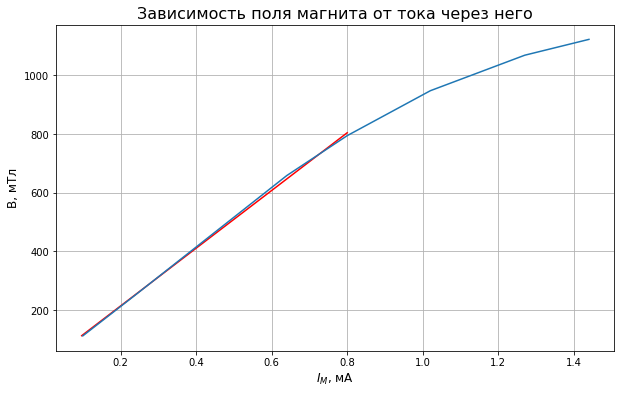

In [57]:
# для рассчета поля магнита в следующих пунктах
x = point0[point0.columns[0]]
y = point0[point0.columns[1]]

koefs = chart(point0, 'Зависимость поля магнита от тока через него', 0, 1, True, 0, 5)

In [52]:
# Измерение ЭДС Холла меди 0.2 А
copper_02 = open_csv('tables/copper_0.2.csv')
copper_02[r'$\mathscr{E}_x$, мкв'] = copper_02[copper_02.columns[1]] - copper_02[copper_02.columns[1]][1]
copper_02[r'$B$, мТл'] = (copper_02[copper_02.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_02

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.25,-3.0,0.0,262.9
2,0.40,0.0,3.0,410.5
3,0.52,3.0,6.0,528.5
4,0.70,6.0,9.0,705.5
5,0.97,9.0,12.0,971.0
6,1.23,12.0,15.0,1226.7


In [53]:
# Измерение ЭДС Холла меди 0.4 А
copper_04 = open_csv('tables/copper_0.4.csv')
copper_04[r'$\mathscr{E}_x$, мкв'] = copper_04[copper_04.columns[1]] - copper_04[copper_04.columns[1]][1]
copper_04[r'$B$, мТл'] = (copper_04[copper_04.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_04

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.13,0.0,0.0,144.9
2,0.20,3.0,3.0,213.8
3,0.38,6.0,6.0,390.8
4,0.47,9.0,9.0,479.3
5,0.56,15.0,15.0,567.8
6,0.80,21.0,21.0,803.8
7,1.03,27.0,27.0,1030.0
8,1.18,30.0,30.0,1177.5
9,1.40,33.0,33.0,1393.9


In [43]:
# Измерение ЭДС Холла меди 0.6 А
copper_06 = open_csv('tables/copper_0.6.csv')
copper_06[r'$\mathscr{E}_x$, мкв'] = copper_06[copper_06.columns[1]] - copper_06[copper_06.columns[1]][1]
copper_06[r'$B$, мТл'] = (copper_06[copper_06.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_06

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.07,0.0,0.0,85.9
2,0.12,3.0,3.0,135.1
3,0.30,12.0,12.0,312.1
4,0.47,21.0,21.0,479.3
5,0.65,30.0,30.0,656.3
6,0.90,42.0,42.0,902.2
7,1.25,51.0,51.0,1246.4
8,1.42,54.0,54.0,1413.6


In [44]:
# Измерение ЭДС Холла меди 0.8 А
copper_08 = open_csv('tables/copper_0.8.csv')
copper_08[r'$\mathscr{E}_x$, мкв'] = copper_08[copper_08.columns[1]] - copper_08[copper_08.columns[1]][1]
copper_08[r'$B$, мТл'] = (copper_08[copper_08.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_08

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.23,15.0,0.0,243.3
2,0.43,27.0,12.0,440.0
3,0.53,36.0,21.0,538.3
4,0.67,45.0,30.0,676.0
5,0.78,51.0,36.0,784.2
6,0.95,60.0,45.0,951.4
7,1.28,72.0,57.0,1275.9
8,1.40,75.0,60.0,1393.9


In [54]:
# Измерение ЭДС Холла меди 0.99 А
copper_099 = open_csv('tables/copper_0.99.csv')
copper_099[r'$\mathscr{E}_x$, мкв'] = copper_099[copper_099.columns[1]] - copper_099[copper_099.columns[1]][1]
copper_099[r'$B$, мТл'] = (copper_099[copper_099.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_099

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.20,15.0,0.0,213.8
2,0.36,30.0,15.0,371.1
3,0.54,45.0,30.0,548.1
4,0.65,54.0,39.0,656.3
5,0.84,69.0,54.0,843.2
6,0.99,78.0,63.0,990.7
7,1.29,90.0,75.0,1285.7
8,1.40,93.0,78.0,1393.9


In [55]:
# измерение ЭДС Холла меди в обратную сторону
copper_reverse = open_csv('tables/copper_reverse.csv')
copper_reverse[r'$\mathscr{E}_x$, мкв'] = copper_reverse[copper_reverse.columns[1]] - copper_reverse[copper_reverse.columns[1]][1]
copper_reverse[r'$B$, мТл'] = (copper_reverse[copper_reverse.columns[0]] * koefs[0] + koefs[1]).round(1)
copper_reverse

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.12,0.0,0.0,135.1
2,0.25,-12.0,-12.0,262.9
3,0.32,-18.0,-18.0,331.8
4,0.40,-24.0,-24.0,410.5
5,0.46,-30.0,-30.0,469.5
6,0.65,-48.0,-48.0,656.3
7,0.73,-54.0,-54.0,735.0
8,0.87,-63.0,-63.0,872.7
9,1.07,-75.0,-75.0,1069.4


In [56]:
# измерение ЭДС Холла цинка
zinc = open_csv('tables/zinc.csv')
zinc[r'$\mathscr{E}_x$, мкв'] = zinc[zinc.columns[1]] - zinc[zinc.columns[1]][1]
zinc[r'$B$, мТл'] = (zinc[zinc.columns[0]] * koefs[0] + koefs[1]).round(1)
zinc

,"$I_M$, мА","$U_{24}$, мкв","$\mathscr{E}_x$, мкв","$B$, мТл"
1,0.17,-30.0,0.0,184.3
2,0.25,-24.0,6.0,262.9
3,0.44,-12.0,18.0,449.8
4,0.64,0.0,30.0,646.5
5,0.94,15.0,45.0,941.5
6,1.14,24.0,54.0,1138.2
7,1.39,30.0,60.0,1384.1
